In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from sklearn.datasets import make_blobs

## Dataset

In [3]:
n_features = 2

In [30]:
x , y = make_blobs(n_samples=500, n_features=n_features, centers=2, cluster_std=1.5, random_state=2)
print(x.shape , y.shape)

(500, 2) (500,)


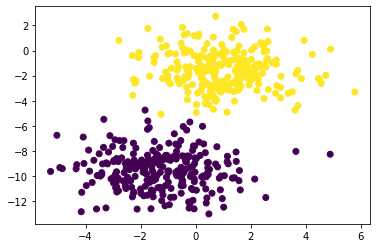

In [31]:
plt.scatter(x[:,0] , x[:,1] , c = y);

In [32]:
X = torch.FloatTensor(x)
Y = torch.FloatTensor(y).reshape(-1 , 1)

## Model

In [33]:
class LogisticRegression(nn.Module):
    def __init__(self , n_features):
        super().__init__()
        
        self.layer = nn.Linear(n_features , 1)
        self.act_layer = nn.Sigmoid()
        
    def forward(self , x):
        y_hat = self.layer(x)
        return self.act_layer(y_hat)

In [34]:
model = LogisticRegression(n_features)

In [35]:
assert model(X).shape == (X.shape[0] , 1)

In [36]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters() , lr = 0.01)

## Training

In [37]:
losses = []
epochs = 1000

for i in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred , Y)
    losses.append(loss.item())
    
    if(i%100==0):
        print(f"Epoch {i} Loss {loss.item()}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

Epoch 0 Loss 3.098508596420288
Epoch 100 Loss 0.5354865193367004
Epoch 200 Loss 0.30429545044898987
Epoch 300 Loss 0.21255995333194733
Epoch 400 Loss 0.16096647083759308
Epoch 500 Loss 0.12786583602428436
Epoch 600 Loss 0.10513924807310104
Epoch 700 Loss 0.08878325670957565
Epoch 800 Loss 0.07656192034482956
Epoch 900 Loss 0.06714165210723877


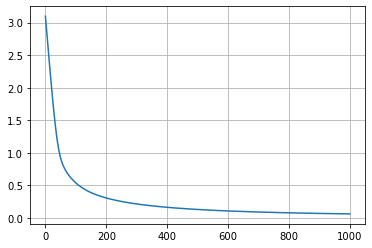

In [38]:
plt.plot(losses)
plt.grid(True)

## Predictions

In [39]:
preds = []
for i in range(len(X)):
    pred = model(X[i])
    pred = torch.where(pred < 0.5 , 0 , 1)
    preds.append(pred.item())

In [40]:
acc = np.mean(preds == Y.numpy().squeeze(1))*100
print("Accuracy: {}".format(acc))

Accuracy: 99.2


In [41]:
for name , param in model.named_parameters():
    print(name , param)

layer.weight Parameter containing:
tensor([[0.6391, 0.7845]], requires_grad=True)
layer.bias Parameter containing:
tensor([3.8581], requires_grad=True)


## Optimal Line

In [42]:
a , b = model.layer.weight[0][0].detach() , model.layer.weight[0][1].detach()
c = model.layer.bias[0].detach()

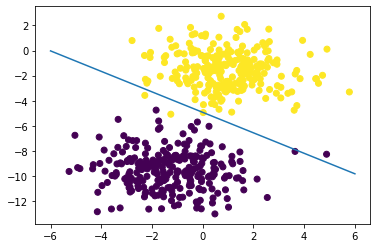

In [57]:
x_ = np.linspace(-6, 6, 5)
y_ = -(a*x_ + c)/b

plt.scatter(x[:,0] , x[:,1] , c=y)
plt.plot(x_ , y_);